<a href="https://colab.research.google.com/github/dokin0802/SinGAN/blob/master/12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import glob
path = '/content/drive/MyDrive/architecture_aug/ex2/augf2/p'
g = glob.glob(path+'/*')

def rename(files):
  for i,f in enumerate(files):
      os.rename(f, os.path.join(path, 'p_' + '{0:03d}.jpg'.format(i)))

In [ ]:
rename(g)


In [1]:
import os.path
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from pathlib import Path
from tqdm import tqdm
from time import perf_counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
dir_ = Path('/content/drive/MyDrive/architecture_aug/ex1/augf1')
filepaths = list(dir_.glob(r'**/*.jpg'))
def proc_img(filepath):
    """
   		이미지데이터의 경로와 label데이터로 데이터프레임 만들기
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # 경로와 라벨 concatenate
    df = pd.concat([filepath, labels], axis=1)

    # index 재설정
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)

    return df

df = proc_img(filepaths)
df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/architecture_aug/ex1/au...,r
1,/content/drive/MyDrive/architecture_aug/ex1/au...,r
2,/content/drive/MyDrive/architecture_aug/ex1/au...,r
3,/content/drive/MyDrive/architecture_aug/ex1/au...,r
4,/content/drive/MyDrive/architecture_aug/ex1/au...,r


In [4]:
print(f'Number of pictures: {df.shape[0]}\n')
print(f'Number of different labels: {len(df.Label.unique())}\n')
print(f'Labels: {df.Label.unique()}')

Number of pictures: 260

Number of different labels: 2

Labels: ['r' 'g']


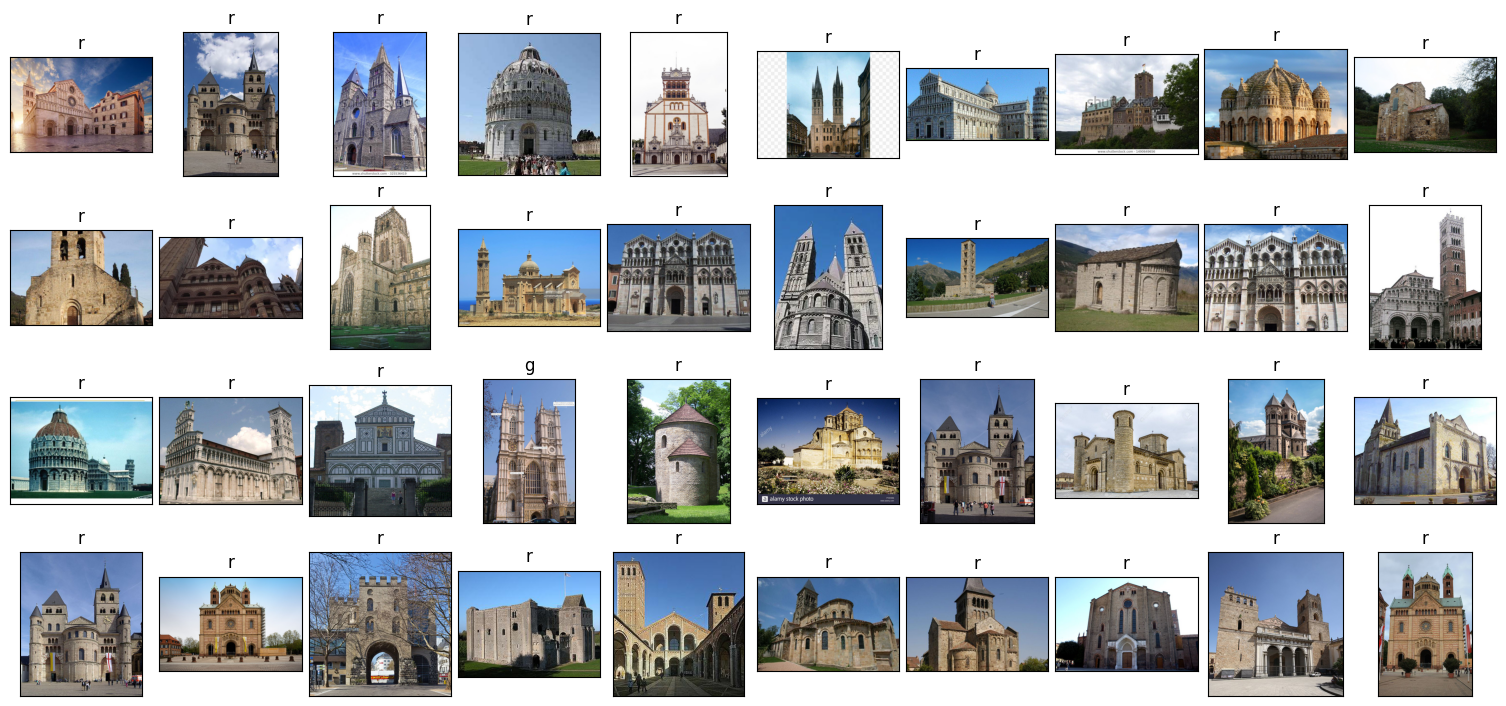

In [5]:
# 데이터 확인
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

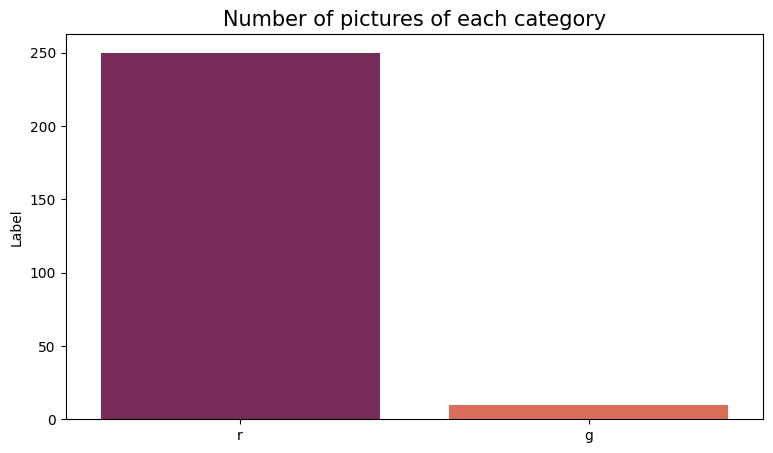

In [6]:
vc = df['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [19]:
train_df =df

dir_ = Path('/content/drive/MyDrive/test')
filepaths = list(dir_.glob(r'**/*.jpg'))
test_df = proc_img(filepaths)

In [20]:
import numpy as np
import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.20)

train_gen = train_datagen.flow_from_directory('/content/drive/MyDrive/architecture_aug/ex1/augf1',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary',subset='training')
val_gen  = train_datagen.flow_from_directory('/content/drive/MyDrive/architecture_aug/ex1/augf1',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary',subset='validation')

Found 208 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


In [58]:
train_generator,test_generator,train_images,val_images,test_images=create_gen()


Found 208 validated image filenames belonging to 2 classes.
Found 52 validated image filenames belonging to 2 classes.
Found 100 validated image filenames belonging to 2 classes.


In [68]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))
# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the CNN
cnn.compile(optimizer = 'adam',
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])
cnn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 17, 17, 128)    

In [69]:
cnn.fit(x = train_gen, validation_data = val_gen, epochs = 50)

Epoch 1/50
7/7 [==============================] - 5s 348ms/step - loss: 0.4274 - accuracy: 0.9423 - val_loss: 0.1700 - val_accuracy: 0.9615
Epoch 2/50
7/7 [==============================] - 2s 301ms/step - loss: 0.1937 - accuracy: 0.9615 - val_loss: 0.2036 - val_accuracy: 0.9615
Epoch 3/50
7/7 [==============================] - 2s 322ms/step - loss: 0.1897 - accuracy: 0.9615 - val_loss: 0.1699 - val_accuracy: 0.9615
Epoch 4/50
7/7 [==============================] - 2s 292ms/step - loss: 0.1665 - accuracy: 0.9615 - val_loss: 0.1678 - val_accuracy: 0.9615
Epoch 5/50
7/7 [==============================] - 2s 309ms/step - loss: 0.1773 - accuracy: 0.9615 - val_loss: 0.1710 - val_accuracy: 0.9615
Epoch 6/50
7/7 [==============================] - 2s 299ms/step - loss: 0.1679 - accuracy: 0.9615 - val_loss: 0.1658 - val_accuracy: 0.9615
Epoch 7/50
7/7 [==============================] - 2s 299ms/step - loss: 0.1524 - accuracy: 0.9615 - val_loss: 0.1701 - val_accuracy: 0.9615
Epoch 8/50
7/7 [====

In [70]:

test_datagen =  ImageDataGenerator(rescale=1/255)

test_gen  = test_datagen.flow_from_directory('/content/drive/MyDrive/test',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 100 images belonging to 2 classes.


In [71]:
cnn.evaluate(test_gen)

4/4 [==============================] - 2s 481ms/step - loss: 8.5148 - accuracy: 0.4900


[8.514829635620117, 0.49000000953674316]

In [72]:
# Predict the label of the test_images
pred = cnn.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')


4/4 [==============================] - 2s 353ms/step
Accuracy on the test set: 50.00%


In [73]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

              precision    recall  f1-score   support

           g       0.50      1.00      0.67        50
           r       1.00      0.00      0.00        50

    accuracy                           0.50       100
   macro avg       0.75      0.50      0.33       100
weighted avg       0.75      0.50      0.33       100



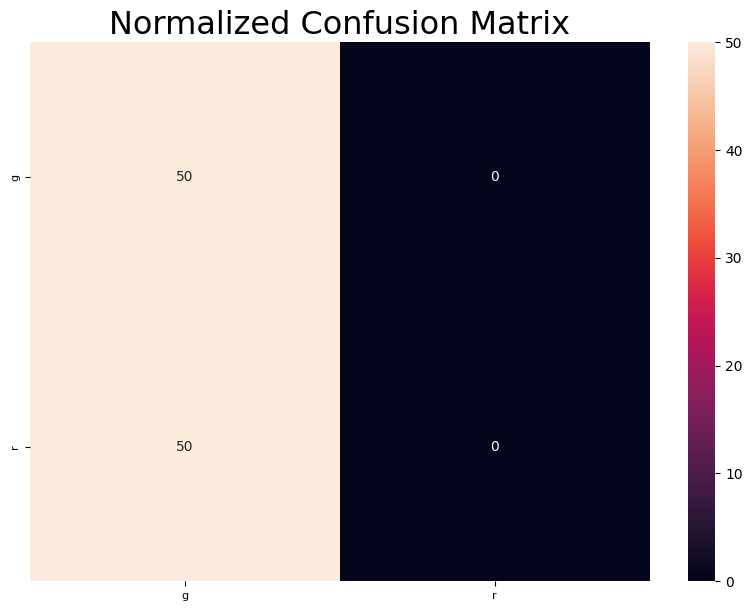

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred)#, normalize='None')
plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=True)
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [50]:
def create_gen():
    # 생성기 및 데이터 증강으로 이미지 로드
    train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
        validation_split=0.2
    )

    test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
        preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
    )

    train_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath', # 파일위치 열이름
        y_col='Label', # 클래스 열이름
        target_size=(224, 224), # 이미지 사이즈
        color_mode='rgb', # 이미지 채널수
        class_mode='binary', # Y값(Label값)
        batch_size=32,
        shuffle=True, # 데이터를 섞을지 여부
        seed=0,
        subset='training', # train 인지 val인지 설정
        rotation_range=30, # 회전제한 각도 30도
        zoom_range=0.15, # 확대 축소 15%
        width_shift_range=0.2, # 좌우이동 20%
        height_shift_range=0.2, # 상하이동 20%
        shear_range=0.15, # 반시계방햐의 각도
        horizontal_flip=True, # 좌우 반전 True
        fill_mode="nearest"
        # 이미지 변경시 보완 방법 (constant, nearest, reflect, wrap) 4개 존재
    )

    val_images = train_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='binary',
        batch_size=32,
        shuffle=True,
        seed=0,
        subset='validation',
        rotation_range=30,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    test_images = test_generator.flow_from_dataframe(
        dataframe=test_df,
        x_col='Filepath',
        y_col='Label',
        target_size=(224, 224),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=False
    )

    return train_generator,test_generator,train_images,val_images,test_images

In [28]:
# Create the generators
train_generator,test_generator,train_images,val_images,test_images=create_gen()
print('\n')

def get_model():
    # Initialising the CNN
  #cnn = tf.keras.models.Sequential()

  # Step 1 - Convolution
  cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))

  # Step 2 - Pooling
  cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

  # Adding convolutional layer
  cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
  cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
  # Step 3 - Flattening
  cnn.add(tf.keras.layers.Flatten())

  # Step 4 - Full Connection
  cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

  # Step 5 - Output Layer
  cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

  # Compiling the CNN
  cnn.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
  cnn.summary()

  return cnn

# Train모델 학습


# 전이 학습 모델 가져오기
cnn = tf.keras.models.Sequential()
get_model()

start = perf_counter()

# 모델 학습
history = cnn.fit(train_images,validation_data=val_images,epochs=1,verbose=0)

# 학습시간과 val_accuracy 저장
duration = perf_counter() - start
duration = round(duration,2)

print(f"cnn trained in {duration} sec")

val_acc = history.history['val_accuracy']


Found 208 validated image filenames belonging to 2 classes.
Found 52 validated image filenames belonging to 2 classes.
Found 100 validated image filenames belonging to 2 classes.


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 flat

InvalidArgumentError: ignored

In [ ]:
# test데이터로 모델 성능 예측
for name, model in models.items():

    # Predict the label of the test_images
    pred = models[name]['model'].predict(test_images)
    pred = np.argmax(pred,axis=1)

    # Map the label
    labels = (train_images.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]

    y_test = list(test_df.Label)
    acc = accuracy_score(y_test,pred)
    models[name]['acc'] = round(acc,4)
    print(f'**{name} has a {acc * 100:.2f}% accuracy on the test set**')

# Create a DataFrame with the results
models_result = []

for name, v in models.items():
    models_result.append([ name, models[name]['val_acc'][-1],
                          models[name]['acc'],
                          models[name]['perf']])

df_results = pd.DataFrame(models_result,
                          columns = ['model','val_accuracy','accuracy','Training time (sec)'])
df_results.sort_values(by='accuracy', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

10/10 [==============================] - 5s 312ms/step
**DenseNet121 has a 59.00% accuracy on the test set**
10/10 [==============================] - 4s 313ms/step
**MobileNetV2 has a 55.33% accuracy on the test set**
10/10 [==============================] - 6s 319ms/step
**DenseNet201 has a 64.67% accuracy on the test set**
10/10 [==============================] - 5s 312ms/step
**EfficientNetB0 has a 16.33% accuracy on the test set**
10/10 [==============================] - 5s 316ms/step
**EfficientNetB1 has a 15.00% accuracy on the test set**
10/10 [==============================] - 5s 316ms/step
**InceptionV3 has a 55.33% accuracy on the test set**
10/10 [==============================] - 4s 311ms/step
**MobileNetV3Large has a 30.33% accuracy on the test set**
10/10 [==============================] - 6s 317ms/step
**ResNet152V2 has a 63.00% accuracy on the test set**
10/10 [==============================] - 4s 313ms/step
**ResNet50 has a 31.00% accuracy on the test set**
10/10 [====

,model,val_accuracy,accuracy,Training time (sec)
0,DenseNet201,0.7467,0.6467,24.61
1,ResNet152V2,0.7467,0.6300,22.44
2,DenseNet121,0.7133,0.5900,19.59
3,ResNet50V2,0.7833,0.5767,15.95
4,Xception,0.7667,0.5767,14.91
5,MobileNetV2,0.7333,0.5533,14.99
6,InceptionV3,0.7133,0.5533,18.08
7,VGG19,0.5800,0.4700,14.15
8,VGG16,0.6300,0.4700,12.20
9,ResNet50,0.5067,0.3100,16.04


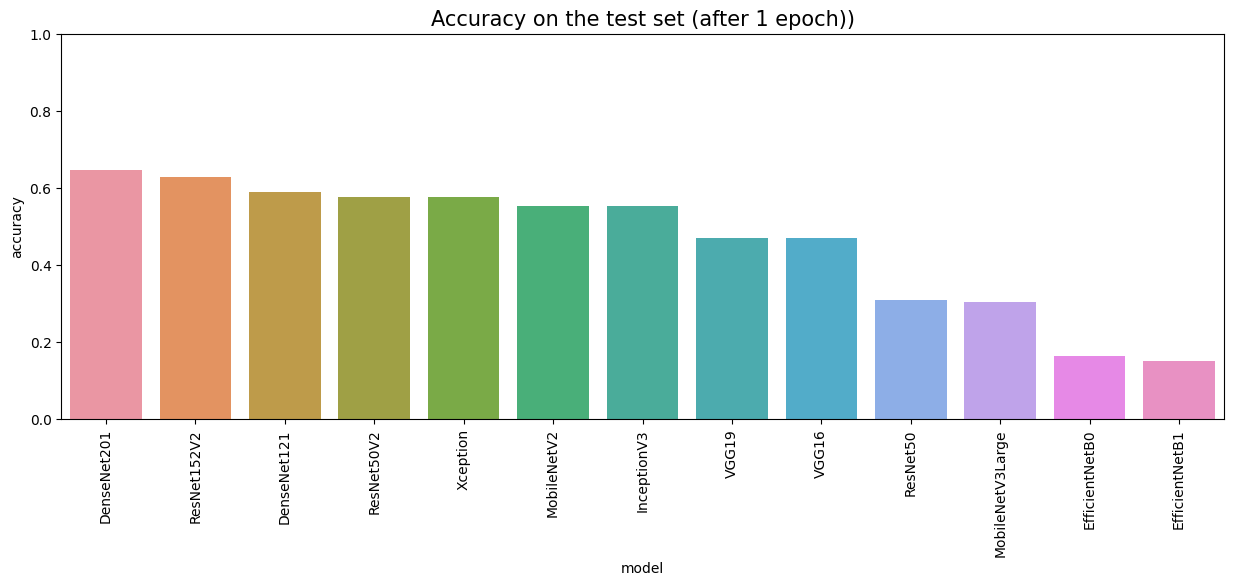

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'model', y = 'accuracy', data = df_results)
plt.title('Accuracy on the test set (after 1 epoch))', fontsize = 15)
plt.ylim(0,1)
plt.xticks(rotation=90)
plt.show()

In [ ]:
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.DenseNet201)
history = model.fit(train_images,validation_data=val_images,epochs=4)

Found 1200 validated image filenames belonging to 6 classes.
Found 300 validated image filenames belonging to 6 classes.
Found 300 validated image filenames belonging to 6 classes.
Epoch 1/4
38/38 [==============================] - 25s 358ms/step - loss: 0.8723 - accuracy: 0.6558 - val_loss: 0.6119 - val_accuracy: 0.7200
Epoch 2/4
38/38 [==============================] - 10s 274ms/step - loss: 0.4194 - accuracy: 0.8508 - val_loss: 0.4548 - val_accuracy: 0.8300
Epoch 3/4
38/38 [==============================] - 11s 281ms/step - loss: 0.3213 - accuracy: 0.8825 - val_loss: 0.4446 - val_accuracy: 0.8200
Epoch 4/4
38/38 [==============================] - 11s 277ms/step - loss: 0.2832 - accuracy: 0.8892 - val_loss: 0.4817 - val_accuracy: 0.8100


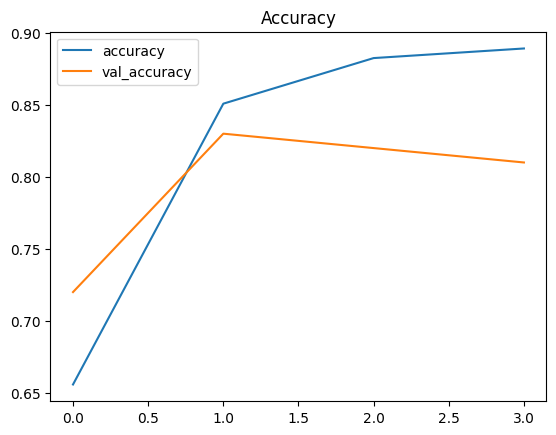

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

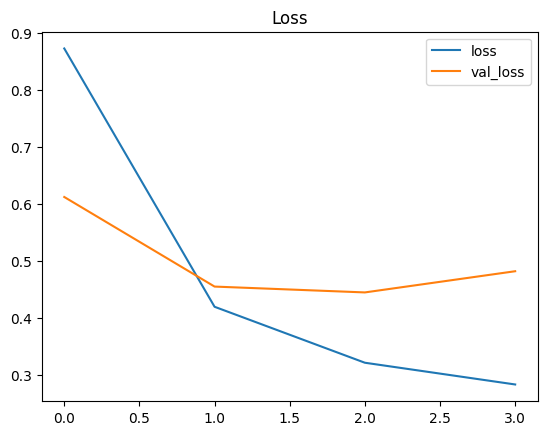

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

10/10 [==============================] - 6s 315ms/step
Accuracy on the test set: 69.67%


In [ ]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

                  precision    recall  f1-score   support

         Baroque       0.66      1.00      0.79        50
Deconstructivism       0.68      0.82      0.75        50
          Gothic       0.78      0.50      0.61        50
   International       0.82      0.62      0.70        50
      Postmodern       0.57      0.60      0.58        50
      Romanesque       0.78      0.64      0.70        50

        accuracy                           0.70       300
       macro avg       0.71      0.70      0.69       300
    weighted avg       0.71      0.70      0.69       300



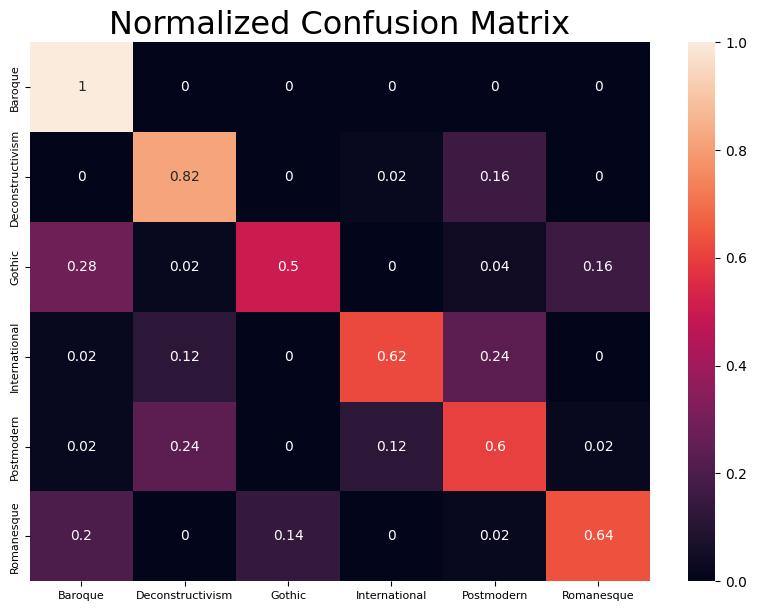

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')



plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=True)
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [ ]:
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.DenseNet121)
history = model.fit(train_images,validation_data=val_images,epochs=4)

Found 1200 validated image filenames belonging to 6 classes.
Found 300 validated image filenames belonging to 6 classes.
Found 300 validated image filenames belonging to 6 classes.
Epoch 1/4
38/38 [==============================] - 19s 323ms/step - loss: 1.0030 - accuracy: 0.5892 - val_loss: 0.6601 - val_accuracy: 0.7000
Epoch 2/4
38/38 [==============================] - 10s 273ms/step - loss: 0.5027 - accuracy: 0.8075 - val_loss: 0.6114 - val_accuracy: 0.7467
Epoch 3/4
38/38 [==============================] - 10s 274ms/step - loss: 0.3820 - accuracy: 0.8575 - val_loss: 0.4939 - val_accuracy: 0.7900
Epoch 4/4
38/38 [==============================] - 10s 273ms/step - loss: 0.3442 - accuracy: 0.8658 - val_loss: 0.4852 - val_accuracy: 0.8133


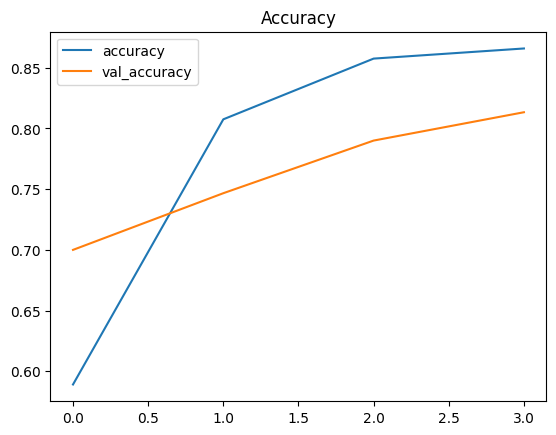

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

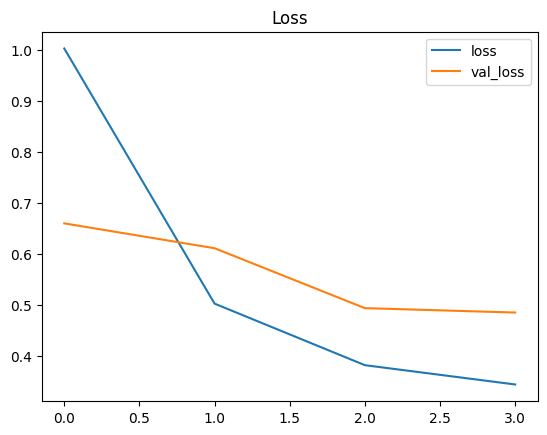

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

10/10 [==============================] - 5s 312ms/step
Accuracy on the test set: 62.00%


In [ ]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

                  precision    recall  f1-score   support

         Baroque       0.59      1.00      0.74        50
Deconstructivism       0.66      0.80      0.72        50
          Gothic       0.75      0.18      0.29        50
   International       0.81      0.52      0.63        50
      Postmodern       0.52      0.56      0.54        50
      Romanesque       0.59      0.66      0.62        50

        accuracy                           0.62       300
       macro avg       0.65      0.62      0.59       300
    weighted avg       0.65      0.62      0.59       300



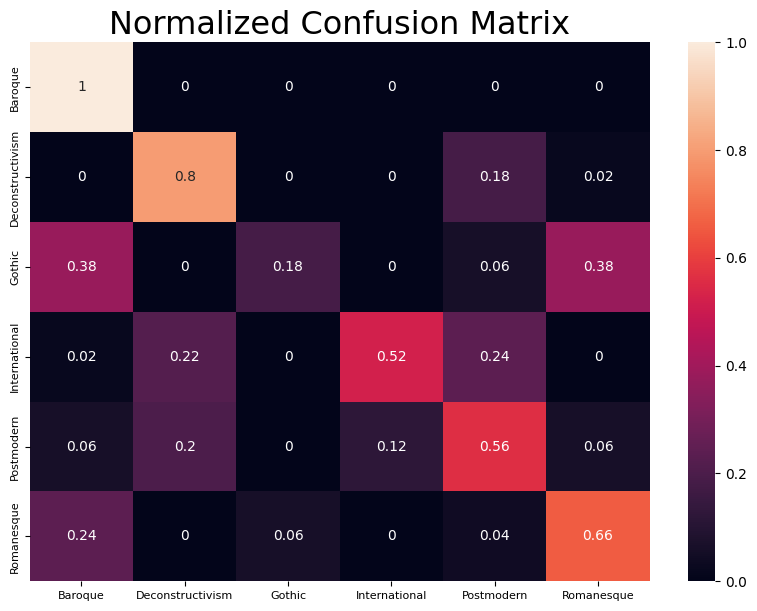

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')



plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=True)
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [ ]:
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.Xception)
history = model.fit(train_images,validation_data=val_images,epochs=4)

Found 1200 validated image filenames belonging to 6 classes.
Found 300 validated image filenames belonging to 6 classes.
Found 300 validated image filenames belonging to 6 classes.
Epoch 1/4
38/38 [==============================] - 15s 296ms/step - loss: 0.9160 - accuracy: 0.6400 - val_loss: 0.5952 - val_accuracy: 0.7333
Epoch 2/4
38/38 [==============================] - 10s 271ms/step - loss: 0.5201 - accuracy: 0.7800 - val_loss: 0.5789 - val_accuracy: 0.7367
Epoch 3/4
38/38 [==============================] - 10s 274ms/step - loss: 0.4492 - accuracy: 0.8258 - val_loss: 0.5694 - val_accuracy: 0.7467
Epoch 4/4
38/38 [==============================] - 10s 271ms/step - loss: 0.3330 - accuracy: 0.8683 - val_loss: 0.5584 - val_accuracy: 0.7700


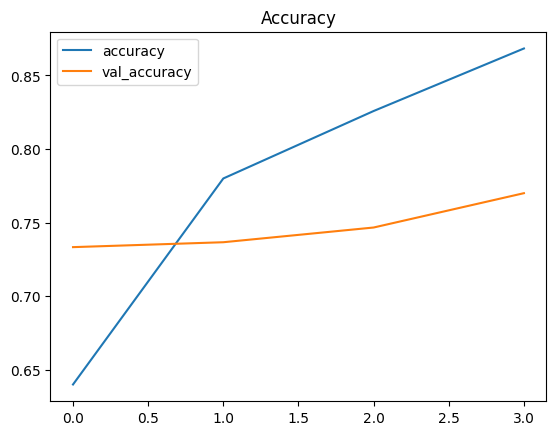

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

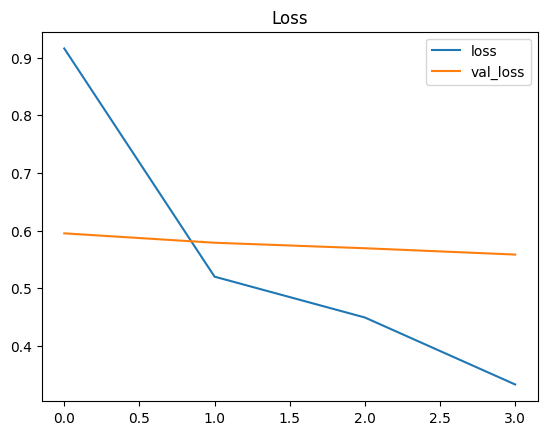

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

10/10 [==============================] - 4s 316ms/step
Accuracy on the test set: 60.67%


In [ ]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

                  precision    recall  f1-score   support

         Baroque       0.91      0.78      0.84        50
Deconstructivism       0.68      0.76      0.72        50
          Gothic       0.67      0.04      0.08        50
   International       0.80      0.40      0.53        50
      Postmodern       0.53      0.70      0.60        50
      Romanesque       0.45      0.96      0.61        50

        accuracy                           0.61       300
       macro avg       0.67      0.61      0.56       300
    weighted avg       0.67      0.61      0.56       300



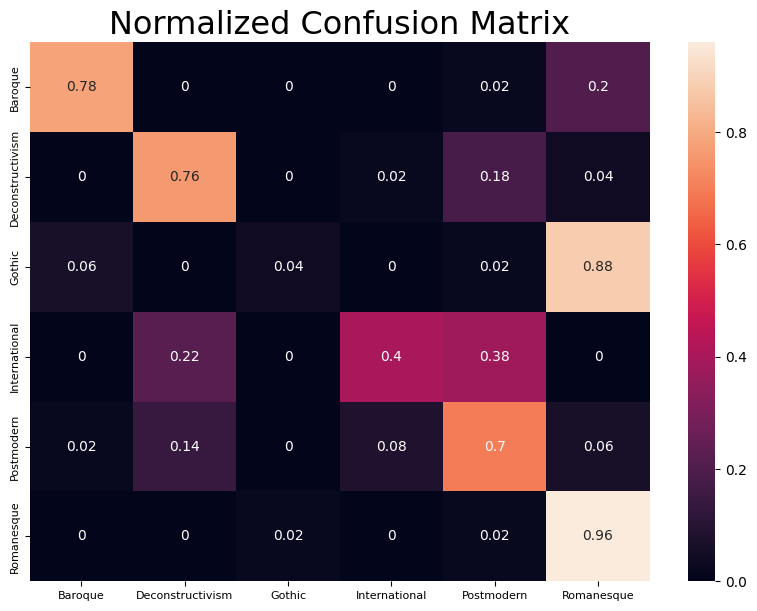

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')



plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=True)
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [ ]:
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.ResNet152V2)
history = model.fit(train_images,validation_data=val_images,epochs=4)

Found 1200 validated image filenames belonging to 6 classes.
Found 300 validated image filenames belonging to 6 classes.
Found 300 validated image filenames belonging to 6 classes.
Epoch 1/4
38/38 [==============================] - 24s 347ms/step - loss: 0.8844 - accuracy: 0.6533 - val_loss: 0.5993 - val_accuracy: 0.7733
Epoch 2/4
38/38 [==============================] - 10s 274ms/step - loss: 0.3998 - accuracy: 0.8358 - val_loss: 0.5415 - val_accuracy: 0.7600
Epoch 3/4
38/38 [==============================] - 10s 273ms/step - loss: 0.2202 - accuracy: 0.9175 - val_loss: 0.5133 - val_accuracy: 0.8067
Epoch 4/4
38/38 [==============================] - 10s 273ms/step - loss: 0.1233 - accuracy: 0.9658 - val_loss: 0.5676 - val_accuracy: 0.8033


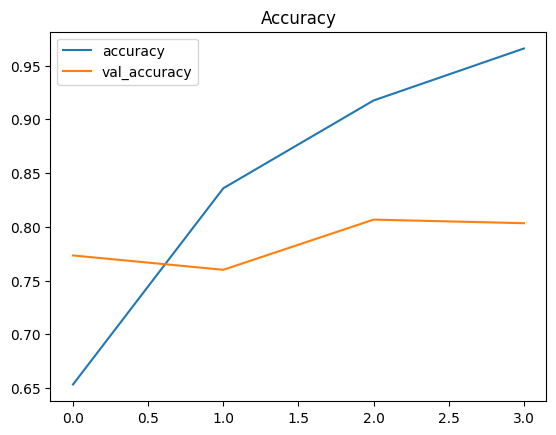

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

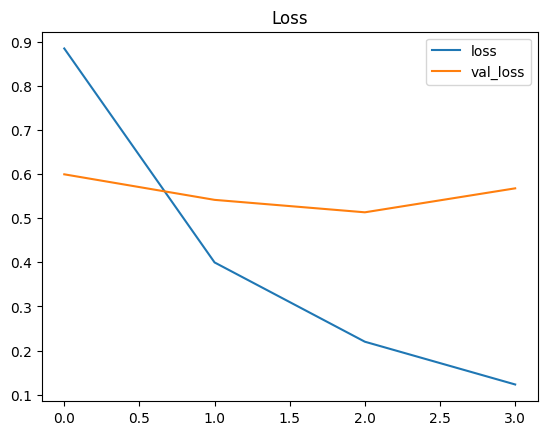

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

10/10 [==============================] - 6s 317ms/step
Accuracy on the test set: 69.33%


In [ ]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

                  precision    recall  f1-score   support

         Baroque       0.90      0.94      0.92        50
Deconstructivism       0.65      0.78      0.71        50
          Gothic       0.85      0.34      0.49        50
   International       0.88      0.56      0.68        50
      Postmodern       0.57      0.66      0.61        50
      Romanesque       0.56      0.88      0.69        50

        accuracy                           0.69       300
       macro avg       0.74      0.69      0.68       300
    weighted avg       0.74      0.69      0.68       300



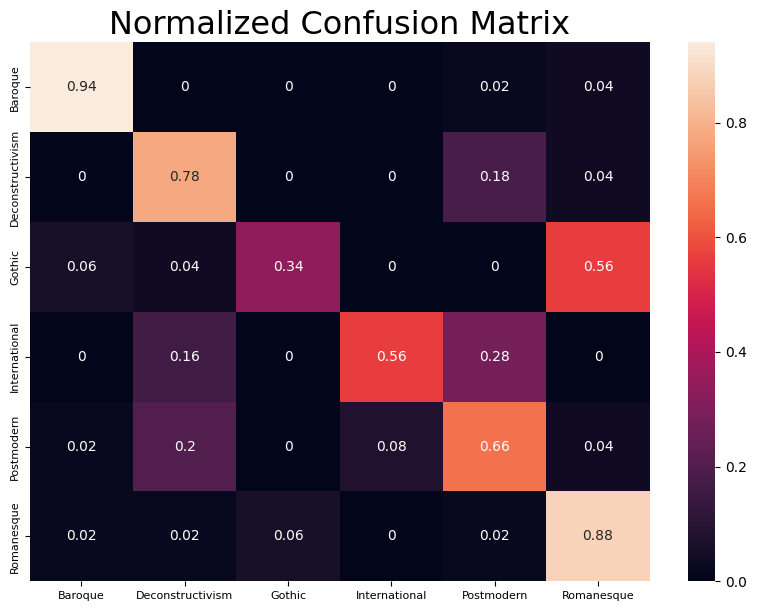

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')



plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=True)
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [ ]:
train_generator,test_generator,train_images,val_images,test_images=create_gen()

model = get_model(tf.keras.applications.InceptionV3)
history = model.fit(train_images,validation_data=val_images,epochs=4)

Found 1200 validated image filenames belonging to 6 classes.
Found 300 validated image filenames belonging to 6 classes.
Found 300 validated image filenames belonging to 6 classes.
Epoch 1/4
38/38 [==============================] - 16s 309ms/step - loss: 1.0242 - accuracy: 0.5642 - val_loss: 0.6598 - val_accuracy: 0.7300
Epoch 2/4
38/38 [==============================] - 10s 273ms/step - loss: 0.5286 - accuracy: 0.7958 - val_loss: 0.5913 - val_accuracy: 0.7600
Epoch 3/4
38/38 [==============================] - 10s 275ms/step - loss: 0.3907 - accuracy: 0.8500 - val_loss: 0.6923 - val_accuracy: 0.7467
Epoch 4/4
38/38 [==============================] - 10s 276ms/step - loss: 0.3224 - accuracy: 0.8842 - val_loss: 0.5594 - val_accuracy: 0.7767


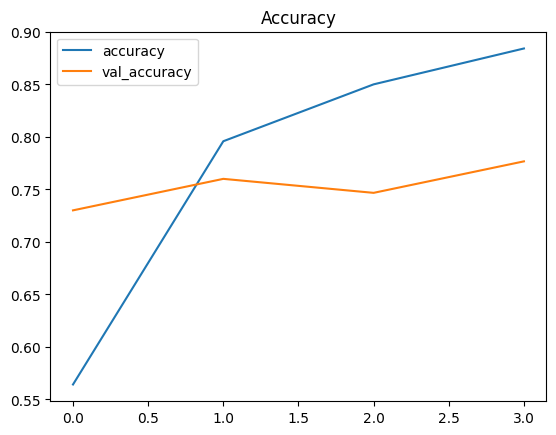

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

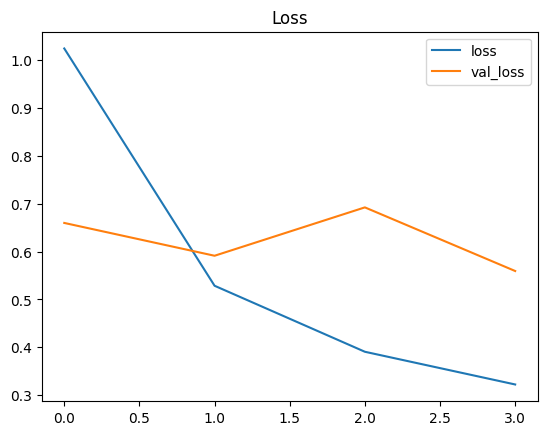

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

10/10 [==============================] - 5s 316ms/step
Accuracy on the test set: 61.33%


In [ ]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

                  precision    recall  f1-score   support

         Baroque       0.88      0.88      0.88        50
Deconstructivism       0.58      0.84      0.69        50
          Gothic       0.80      0.08      0.15        50
   International       0.71      0.58      0.64        50
      Postmodern       0.56      0.40      0.47        50
      Romanesque       0.47      0.90      0.62        50

        accuracy                           0.61       300
       macro avg       0.67      0.61      0.57       300
    weighted avg       0.67      0.61      0.57       300



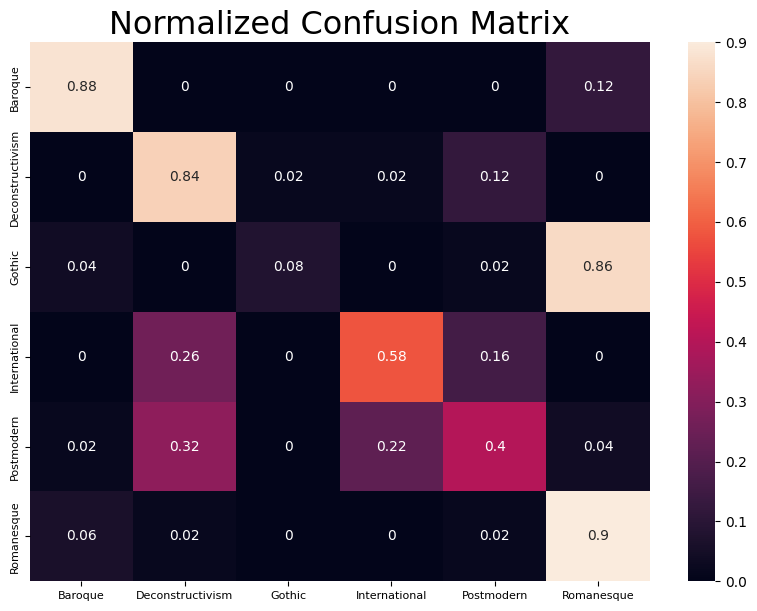

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')



plt.figure(figsize = (10,7))
sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)),cbar=True)
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()